## ** 실습 과제2 <11주차 과제 - 100점>**

### **(1) 각각의 문제 바로 아래에 답을 작성 후, Bigdata_project2.ipynb 파일을 한림SmartLEAD에 제출할 것**
### **(2) 제출 데드라인 : 2022.11.07(월요일) ~ 2022.11.13(일요일) 23:59 까지**
### **(3) 부정행위 적발 시, 원본(보여준 사람)과 복사본(베낀 사람) 모두 0점 처리**
### **(4) !!해당 문제의 코드와 출력 결과를 반드시 기록할 것(둘 중 하나라도 없으면 해당 문제 0점처리)!!**

- - -



### **1. 다음의 의료비 예측 데이터 세트 테이터를 사용하여 Charges를 반응변수(종속변수)로 하는 ``다중회귀분석(Multiple Linear Regression)``을 진행하시오.**

``* 다중회귀분석 50점``

**<의료비 예측 데이터 세트>**

  * age: age of primary beneficiary
  * sex: insurance contractor gender, female, male
  * bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
  * children: Number of children covered by health insurance / Number of dependents
  * smoker: Smoking
  * region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
  * charges: Individual medical costs billed by health insurance

<br>

#### **다음의 조건을 만족해야 함**

```
## 조건
1.	Charges를 반응변수로 사용하고 그 외 나머지를 설명변수로 사용.
2.	createDataPartition을 이용하여 Train/Test set 분리 후 회귀모델 생성. 
3.	Summary함수를 사용하여 회귀분석 결과 해석을 작성.
4.	분석 결과에 기반하여Feature Selection(변수 선택) 및 새로운 회귀모델 생성.
5.	Test set을 이용한 Predict(예측)결과 비교.
```



### **1. 다중회귀분석 (50점)**

* 아래의 코드 작성란에 코드 작성후 결과 출력하세요.

In [3]:
install.packages(c("tidyverse","data.table","devtools","caret"))
library(tidyverse)
library(data.table)
library(devtools)
library(caret)
options(repr.plot.width=13, repr.plot.height=13)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘textshaping’, ‘ragg’, ‘pkgdown’


Warning message in install.packages(c("tidyverse", "data.table", "devtools", "caret")):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages(c("tidyverse", "data.table", "devtools", "caret")):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages(c("tidyverse", "data.table", "devtools", "caret")):
“installation of package ‘pkgdown’ had non-zero exit status”
Warning message in install.packages(c("tidyverse", "data.table", "devtools", "caret")):
“installation of package ‘devtools’ had non-zero exit status”


In [ ]:
system("gdown --id 1xeQY_LWCHcCzQ3f1Zvl4yRDWjKTtAFbo")
system("ls", TRUE)

[1] "insurance.csv"                 "sample_data"                  
[3] "Stroke Prediction Dataset.csv"

In [6]:
DF <- fread("/content/insurance.csv", encoding = "UTF-8")
index <- caret::createDataPartition(y = DF$charges , p = 0.7 , list = FALSE)
train <- DF[index,]
test<- DF[-index,]

model <- lm(charges ~ age + sex + bmi + children + smoker + region , data = train)
summary(model)

newmodel <- lm(charges ~ age + bmi + children + smoker , data = train)
summary(newmodel)

predict_value <- predict(newmodel,test,type="response") %>% tibble(predict_value = .)
predict_check <- test %>% select(charges) %>% dplyr::bind_cols(.,predict_value)

predict_check



Call:
lm(formula = charges ~ age + sex + bmi + children + smoker + 
    region, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-11294.9  -2913.0   -999.1   1554.2  29824.6 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -12288.73    1204.21 -10.205   <2e-16 ***
age                257.17      14.56  17.666   <2e-16 ***
sexmale           -231.80     403.29  -0.575   0.5656    
bmi                355.44      34.97  10.165   <2e-16 ***
children           432.72     170.78   2.534   0.0114 *  
smokeryes        23883.72     500.03  47.764   <2e-16 ***
regionnorthwest   -519.75     572.11  -0.908   0.3639    
regionsoutheast   -958.54     582.34  -1.646   0.1001    
regionsouthwest   -879.87     579.28  -1.519   0.1291    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6139 on 928 degrees of freedom
Multiple R-squared:  0.7462,	Adjusted R-squared:  0.744 
F-statistic:   341 on 8 a


Call:
lm(formula = charges ~ age + bmi + children + smoker, data = train)

Residuals:
   Min     1Q Median     3Q    Max 
-11832  -2979  -1006   1480  29357 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -12637.97    1144.81 -11.039  < 2e-16 ***
age            259.08      14.51  17.850  < 2e-16 ***
bmi            340.81      33.44  10.192  < 2e-16 ***
children       444.28     170.35   2.608  0.00925 ** 
smokeryes    23868.67     497.58  47.969  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6138 on 932 degrees of freedom
Multiple R-squared:  0.7452,	Adjusted R-squared:  0.7441 
F-statistic: 681.4 on 4 and 932 DF,  p-value: < 2.2e-16


charges,predict_value
<dbl>,<dbl>
3756.622,4165.8210
6406.411,8002.7539
28923.137,11713.1197
27808.725,36253.3061
1826.843,5044.6126
11090.718,15441.3194
1837.237,1112.6646
1137.011,3646.9876
14001.134,13427.6132


In [ ]:
#코드설명

#install.packages(c("tidyverse","data.table","devtools","caret"))
#library(tidyverse)
#library(data.table)
#library(devtools)
#library(caret)
#options(repr.plot.width=13, repr.plot.height=13)
#이 부분은 문제 해결을 위해 필요한 모듈들을 설치하고 불러오고 기본 설정을 해주는 코드이다.

#DF <- read.csv("insurance.csv")
#index <- caret::createDataPartition(y = DF$charges , p = 0.7 , list = FALSE)
#train <- DF[index,]
#test<- DF[-index,]
#이 부분은 csv파일을 읽어와서 createDataPartition함수를 사용하여 Train/Test set 분리 후 회귀모델 생성하는 코드이고 분리 비율은 7:3이고 리스트로 반환되지 않도록한다.

#model <- lm(charges ~ age + sex + bmi + children + smoker + region , data = train)
#summary(model)
#이 부분은 lm함수를 사용하여 train집합에서 charges를 반응변수로 사용하고 나머지 요소들은 설명변수로 사용하여 모델로 만드는 부분이고 summary함수를 사용해 결과값이 나오도록한다.

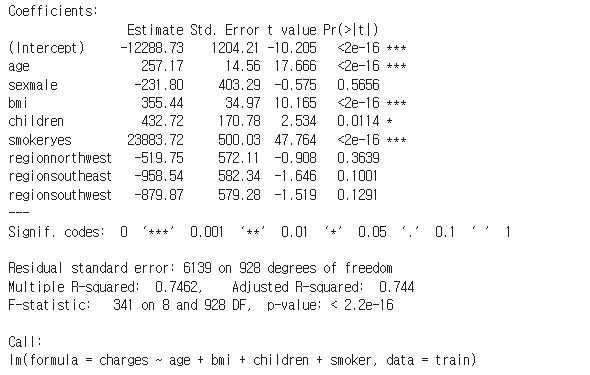

In [ ]:
#첫번째로 나온 모델의 summary 값인데 이것을 분석해보면, p-value값이 0.05보다 작을경우 데이터가 유효하다고 보기 때문에 그 값보다 큰 sexmale이나 regionnorthwest,regionsouthwest,regionsoutheast는 유효한 데이터가 아니라고 판단된다.
#Multiple R-squared의 값이 0.7462인 것으로 보아 전체 데이터의 74퍼센트를 설명하고 있고 Adjusted R-squared가 0.7444인 것으로 보아 74퍼센트의 설명력을 가진다고 볼 수 있다.

#newmodel <- lm(charges ~ age + bmi + children + smoker + region , data = train)
#summary(newmodel)
#이 부분에서는 유효하지 않았던 데이터를 제외하고 다시 모델을 만드는 부분인데, 유효하지 않은 데이터는 sexmale이나 region이렇게 두개가 있으므로 다시 모델을 만들때 제외하고 생성한다.

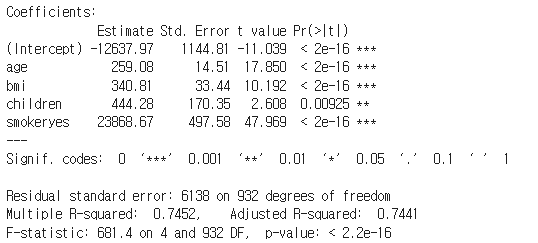

In [ ]:
#두번째로 만든 모델의 summary값인데, Multiple R-squared의 값이 0.7452인 것으로 보아 전체 데이터의 74퍼센트를 설명하고 있고 Adjusted R-squared가 0.7441인 것으로 보아 74퍼센트의 설명력을 가진다고 볼 수 있다.
#이번에 사용한 설명변수들은 모두 p-value가 0.05이하 이므로 유효한 데이터라고 볼 수 있다.

In [ ]:
#predict_value <- predict(newmodel,test,type="response") %>% tibble(predict_value = .)
#predict_check <- test %>% select(charges) %>% dplyr::bind_cols(.,predict_value)

#predict_check
#여기 코드는 두번째로 만든 모델을 test를 사용하여 예측해보는 것으로 test를 예측한 값이 실제 데이터와 일치하는지 알아보기 위해 따로 predict_check라는 이름으로 원래 값과 예측한 값을 데이터프레임으로 만들었다.

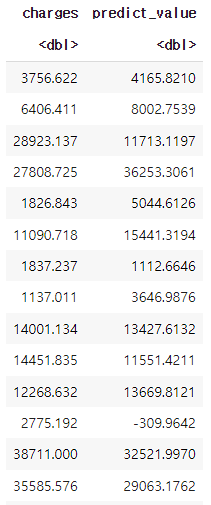

In [ ]:
#초반에 나오는 값이 이렇게 나오는데 원래 값과 예측한 값이 완전히 같지는 않아도 어느정도 비슷한것으로 보아 예측이 어느정도 맞았다고 판단할 수 있다.


### **2. 다음의 뇌졸증 예측 데이터 세트 테이터를 사용하여 stroke를 반응변수(종속변수)로 하는 ``로지스틱 회귀분석(Logistic Regression)``을 진행하시오.**

``* 로지스틱 회귀분석 50점``

**<뇌졸증 예측 데이터 세트>**

  * id: unique identifier
  * gender: "Male", "Female" or "Other"
  * age: age of the patient
  * hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
  * heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
  * ever_married: "No" or "Yes"
  * work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
  * Residence_type: "Rural" or "Urban"
  * avg_glucose_level: average glucose level in blood
  * bmi: body mass index
  * smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
  * stroke: 1 if the patient had a stroke or 0 if not

<br>

#### **다음의 조건을 만족해야 함**

```
## 조건
1. Stroke Prediction 데이터를 로드 후 다음과 같은 전처리 과정을 거친다.
   - 결측값 제거(bmi 컬럼값이 N/A로 작성되어 있는 값을 결측값으로 지정함)
   - 결측값 제거 후 bmi 데이터타입 변경 
   - Stroke 값이 0인 데이터를 랜덤으로 209개 추출
   - 추출된 데이터와 stroke 값이 1인 데이터 병합
2. 병합한 Stroke Prediction 데이터를 caret 패키지의 createDataPartition을 이용하여 train / test 으로 분리할 것 
3. Train dataset을 사용하여glm 함수를 사용하여 모델을 생성하고 반응변수는 stroke로 설정하고, 설명변수는 stroke를 제외한 모든 것을 사용한다. 
   - step, update을 생성한 모델을 새롭게 정의할 것. 
   - 생성한 모델과 새롭게 정의한 모델의 summary결과를 확인한다.
4. Test set을 사용해서 모델을 예측한다. 예측 결과와 원본 데이터와 비교하여 모델의 적합성에 대하여 기술한다. 

```



### **2. 로지스틱 회귀분석 (50점)**

* 아래의 코드 작성란에 코드 작성후 결과 출력하세요.


Call:
glm(formula = stroke ~ ., family = "binomial", data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.26858  -0.66153   0.03754   0.71334   2.57411  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -5.675e+00  1.504e+00  -3.773 0.000161 ***
id                -3.364e-06  6.189e-06  -0.544 0.586740    
gender             4.267e-02  2.765e-01   0.154 0.877366    
age                8.037e-02  1.047e-02   7.680  1.6e-14 ***
hypertension       8.853e-01  3.853e-01   2.297 0.021591 *  
heart_disease      3.494e-01  4.612e-01   0.758 0.448679    
ever_married       1.285e-01  4.416e-01   0.291 0.770987    
work_type         -3.195e-01  1.504e-01  -2.124 0.033632 *  
Residence_type     3.864e-02  2.711e-01   0.143 0.886638    
avg_glucose_level  4.674e-03  2.813e-03   1.662 0.096551 .  
bmi                3.463e-02  2.372e-02   1.460 0.144305    
smoking_status     2.785e-01  1.359e-01   2.050 0.040385 *  


Start:  AIC=369.79
stroke ~ id + gender + age + hypertension + heart_disease + ever_married + 
    work_type + Residence_type + avg_glucose_level + bmi + smoking_status

                    Df Deviance    AIC
- Residence_type     1   345.81 367.81
- gender             1   345.82 367.82
- ever_married       1   345.88 367.88
- id                 1   346.09 368.09
- heart_disease      1   346.39 368.39
<none>                   345.79 369.79
- bmi                1   347.96 369.96
- avg_glucose_level  1   348.63 370.63
- smoking_status     1   350.09 372.09
- work_type          1   350.46 372.46
- hypertension       1   351.47 373.47
- age                1   428.70 450.70

Step:  AIC=367.81
stroke ~ id + gender + age + hypertension + heart_disease + ever_married + 
    work_type + avg_glucose_level + bmi + smoking_status

                    Df Deviance    AIC
- gender             1   345.84 365.84
- ever_married       1   345.89 365.89
- id                 1   346.12 366.12
- heart_diseas


Call:
glm(formula = stroke ~ age + hypertension + work_type + avg_glucose_level + 
    bmi + smoking_status, family = "binomial", data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.20778  -0.66726   0.05106   0.71658   2.62102  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -5.514388   1.008759  -5.467 4.59e-08 ***
age                0.080615   0.009833   8.198 2.44e-16 ***
hypertension       0.896487   0.381171   2.352   0.0187 *  
work_type         -0.320653   0.150068  -2.137   0.0326 *  
avg_glucose_level  0.005019   0.002750   1.825   0.0680 .  
bmi                0.032801   0.023292   1.408   0.1591    
smoking_status     0.290284   0.134858   2.153   0.0314 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 524.02  on 377  degrees of freedom
Residual deviance: 346.77  on 371  degrees of freedom
AI

    stroke predict_value predict_value_cutoff
 1:      0   0.466610626                    0
 2:      0   0.275101963                    0
 3:      0   0.443679753                    0
 4:      0   0.033474951                    0
 5:      0   0.010032838                    0
 6:      0   0.216220929                    0
 7:      0   0.013651000                    0
 8:      0   0.013966072                    0
 9:      0   0.040557070                    0
10:      0   0.090437989                    0
11:      0   0.026501906                    0
12:      0   0.042768380                    0
13:      0   0.356120330                    0
14:      0   0.035114514                    0
15:      0   0.492305557                    0
16:      0   0.008968154                    0
17:      0   0.515121484                    1
18:      0   0.365470377                    0
19:      0   0.022176137                    0
20:      0   0.606900850                    1
21:      1   0.930070336          

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



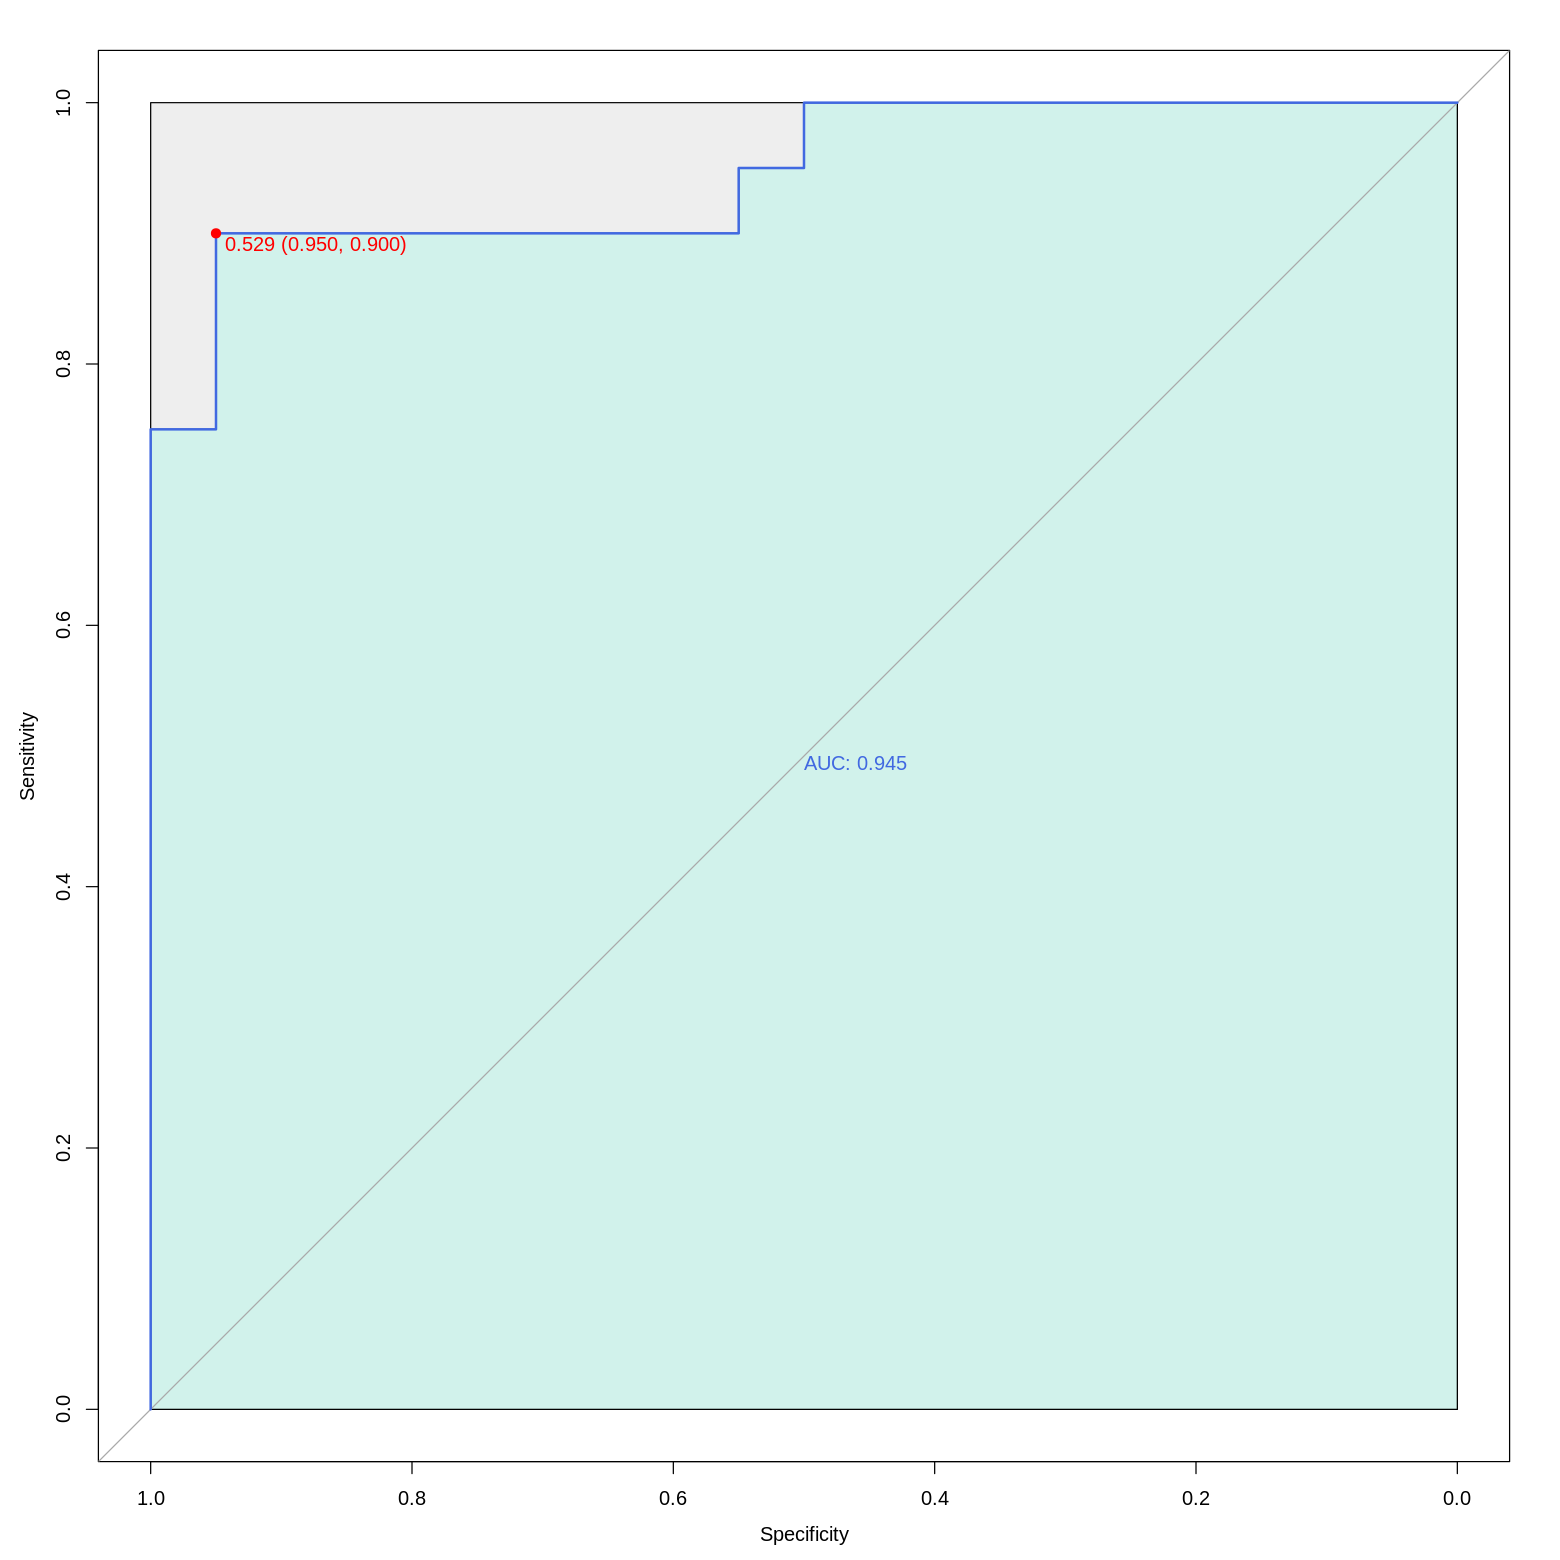

In [8]:
### 코드 작성
DF <- fread("Stroke Prediction Dataset.csv")
DF <- DF[!(DF$bmi == "N/A"),]
DF$bmi <- as.numeric(DF$bmi)

st0 <- DF[(DF$stroke == 0),]
st1 <- DF[(DF$stroke == 1),]
st0 <- st0[sample(nrow(st0),209,replace=F),]

st <- rbind(st0,st1)

index <- caret::createDataPartition(y=st$stroke , p = 0.9 , list = FALSE)
train <- st[index,]
test<- st[-index,]

model <-glm(stroke~. ,data = train, family="binomial")
summary(model)

model2 <- step(model, direction="backward")
summary(model2)

predict_value <- predict(model2,test,type="response") %>% tibble(predict_value = .)
predict_check <- test %>% select(stroke) %>% dplyr::bind_cols(.,predict_value)
predict_cutoff <- predict_check %>% mutate(predict_value_cutoff = as.factor(ifelse(predict_value > 0.5 , 1 , 0)))
predict_cutoff %>% show()

install.packages("pROC")
library("pROC")
roc_c <- roc(predict_cutoff$stroke, predict_cutoff$predict_value) # 실제정답과 glm 예측된 확률
plot.roc(roc_c,   
        col="royalblue",  
        print.auc=TRUE, 
        max.auc.polygon=TRUE,   
        print.thres=TRUE, print.thres.pch=19, print.thres.col = "red",
        auc.polygon=TRUE, auc.polygon.col="#D1F2EB")
                                           

In [ ]:
#DF <- DF[!(DF$bmi == "N/A"),]
#DF$bmi <- as.numeric(DF$bmi)

#st0 <- DF[(DF$stroke == 0),]
#st1 <- DF[(DF$stroke == 1),]
#st0 <- st0[sample(nrow(st0),209,replace=F),]

#st <- rbind(st0,st1)
#Stroke Prediction 데이터를 전처리하는 과정인데 먼저 bmi값이 N/A로 되어있는 값들이 있는 행들을 제거하여 저장하고,
#bmi 데이터타입을 numeric으로 변경한다. 그 다음 st0,st1이라고 해서 stroke의 값이 0인 것들과 1인 것들을 분리한뒤,
#sample함수를 사용하여 st0에서 209개를 랜덤으로 추출하여 저장한다.
#그 다음 st0과 st1 데이터들을 병합한다.

#index <- caret::createDataPartition(y=st$stroke , p = 0.9 , list = FALSE)
#train <- st[index,]
#test<- st[-index,]
#데이터를 createDataPartition를 사용하여 train/test를 9:1로 분할하여 저장하는 코드이다.

#model <-glm(stroke~. ,data = train, family="binomial")
#summary(model)
#train에다가 glm 함수를 사용하여 모델을 생성하고 반응변수는 stroke로 설정하고, 설명변수는 stroke를 제외한 모든 것을 사용하여 만든뒤 summary로 모델을 분석한다.

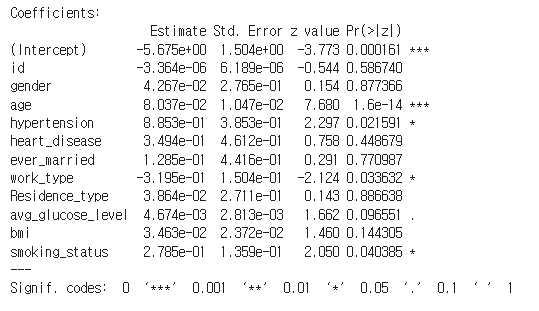

In [ ]:
#이 부분에서는 p-value값이 0.05보다 작은 유효한 데이터가 age,hypertension,worktype세개로 보인다.
#model2 <- step(model, direction="backward")
#summary(model2)

#다음은 step함수를 사용하여, 기존 회귀모형에서 유의하지 않은 변수를 제거하는 방법인데, 이것으로 모델을 다시 만들어서 summary로 모델을 분석한다.

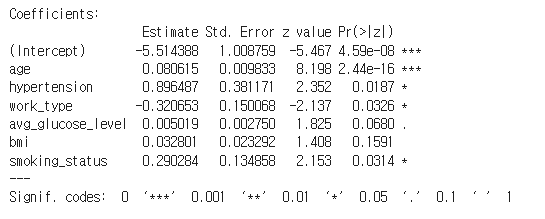

In [ ]:
#전에 많던 데이터들은 다 사라지고 p-value가 0.05보다 작은 데이터들만 남아야 하지만, 0.05보다 커도 비슷한 bmi는 남아있다.

#predict_value <- predict(model2,test,type="response") %>% tibble(predict_value = .)
#predict_check <- test %>% select(stroke) %>% dplyr::bind_cols(.,predict_value)
#predict_cutoff <- predict_check %>% mutate(predict_value_cutoff = as.factor(ifelse(predict_value > 0.5 , 1 , 0)))
#predict_cutoff %>% show()

#마지막으로 test를 사용하여 값을 예측한 값은 predict_value에 넣고, predict_check는 실제 test에서 stroke의 값을 가져와서 predict_value와 비교할수있게 합친 것이다.
#그리고 predict_cutoff는 그 합친 데이터들이 값이 복잡한데, 그것을 간단하게 보기 위해 0.5보다 크면 1로 0.5보다 작으면 0으로 처리하여 비교할수있게 합친 것이다.

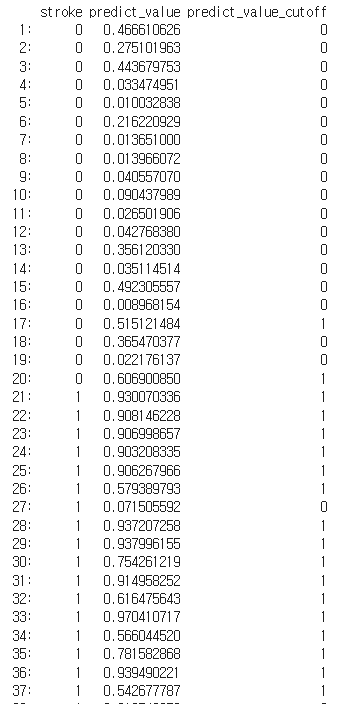

In [ ]:
#결과 화면인데, 17,27번째등 예측값이 틀린 부분도 있지만 실제 적중한 값의 비율이 더 높다는 것을 알수있다.

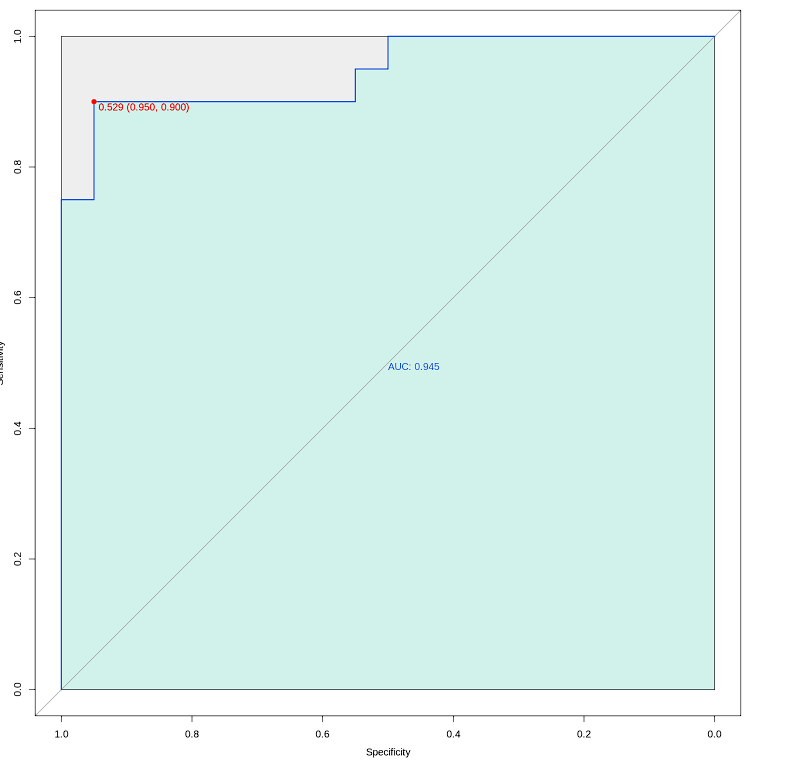

In [ ]:
#install.packages("pROC")
#library("pROC")
#roc_c <- roc(predict_cutoff$stroke, predict_cutoff$predict_value)
#plot.roc(roc_c,   
#        col="royalblue",  
#        print.auc=TRUE, 
#        max.auc.polygon=TRUE,   
#        print.thres=TRUE, print.thres.pch=19, print.thres.col = "red",
#        auc.polygon=TRUE, auc.polygon.col="#D1F2EB")
#roc함수를 사용하여 예측결과와 원본데이터의 모델 적합성을 보기 위해 그래프를 그려보는 코드이다.
#예측 결과와 원본 데이터와 비교하여 AUC가 0.945로 1에 가까울수록 효율적인 모델이므로 좋은 모델이라고 판단된다.